## 1 - Packages

In [5]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.misc import derivative
from tensorflow import keras
import sklearn
from sklearn import datasets

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
def relu(z):
    cache = z
    A = np.maximum(0, z)
    return A, cache
                
def relu_derivate(dA, activation_cache):
    z=activation_cache 
    dZ = np.array(dA, copy=True)
    dZ[z <= 0] = 0
    return dZ

In [4]:
def sigmoid(z):
    cache = z
    A=1/(1+np.exp(-z))
    return A, cache

def sigmoid_derivate(dA, activation_cache):
    z = activation_cache 
    s = 1/(1+np.exp(-z))
    dZ = dA * s * (1-s)
    return dZ
    

In [5]:
def initialisation(dimension_layer):
    parameters = {}
    L = len(dimension_layer)
    for l in range(1, L):
        ####question pq W1.shape ==> (4,13)
        parameters['W' + str(l)] = np.random.randn(dimension_layer[l], dimension_layer[l-1])*0.0251
        parameters['b' + str(l)] = np.zeros((dimension_layer[l],1))
    return parameters

In [6]:
def lineaire_forward(A, W,b):
    Z = np.dot(W,A)+b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    
    cache = (A, W, b)
    
    return Z, cache

In [7]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache=lineaire_forward(A_prev,W,b)
        A, activation_cache=sigmoid(Z)
        
    elif activation == "relu" :
        Z, linear_cache = lineaire_forward(A_prev,W,b)
        A, activation_cache=relu(Z)
        
    cache = (linear_cache, activation_cache)

    return A, cache

In [8]:
def model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A 
        A,cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b'+str(l)], activation="relu")
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)] , parameters['b'+str(L)], activation="sigmoid")
    
    caches.append(cache)
   
    
    return AL, caches

In [9]:
def calcule_cost(AL, Y):
    m = Y.shape[0]
    cost=(-1/m) *np.sum((Y*np.log(AL)+(1-Y)*np.log(1-AL)))
    cost = np.squeeze(cost)
    return cost

In [10]:
def linear_backword(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW=1/m*(np.dot(dZ,A_prev.T))
    db=1/m*(np.sum(dZ,axis=1,keepdims=True))
    dA_prev=np.dot(W.T,dZ)
    
    return dA_prev, dW, db

In [11]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache= cache
    
    if activation == "relu":
            
        dZ=relu_derivate(dA,activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)
        
        
    elif activation == "sigmoid":

        dZ=sigmoid_derivate(dA,activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)
        
    return dA_prev, dW, db

In [12]:
def model_backward(AL, Y, caches):
    
    gradients = {}
    L = len(caches) #le nombre des couches layers
    m = AL.shape[1]
    #Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL+0.01) - np.divide(1 - Y, (1 - AL)+0.01))
    
    current_cache=caches[L-1]
    
    dA_prev, dW, db = linear_activation_backward(dAL, current_cache,activation="sigmoid")
    
    gradients["dA"+ str(L-1)]=dA_prev
    gradients["dW"+ str(L)]=dW
    gradients["db"+ str(L)]=db
    
    for l in reversed(range(L-1)):
        
        current_cache=caches[l]
        dA_prev, dW, db = linear_activation_backward(gradients["dA"+ str(l+1)], current_cache, activation = "relu")
    
        gradients["dA"+ str(l)]=dA_prev
        gradients["dW"+ str(l+1)]=dW
        gradients["db"+ str(l+1)]=db
    
    return gradients

In [13]:
def miseajours_poids(parameters, gradients, learning_rate=0.01):
    
    L = len(parameters) // 2
    
    for l in range(L):
        parameters["W"+ str(l+1)]=parameters["W"+ str(l+1)]-learning_rate*gradients["dW"+ str(l+1)]
        parameters["b"+ str(l+1)]=parameters["b"+ str(l+1)]-learning_rate*gradients["db"+ str(l+1)]

    return parameters

In [14]:
def modelpredict(X, parameters):
    ypred, caches = model_forward(X, parameters)
    return ypred

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris=datasets.load_iris()


xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target)


ytraint=ytrain.reshape(112,1)
ytest=ytest.reshape(38,1)

In [40]:
##### determiner la dimension de reseau :
dimension_reseau = [4,13,13,3]

#####initialisation aléatoire :
parameters=initialisation(dimension_reseau)

######### prediction de Y par les parametre aléatoire :
for i in range(xtrain.shape[0]):
    
    AL, caches = model_forward(xtrain[i].reshape(4,1), parameters)

    gradients  = model_backward(AL, ytrain[i], caches)

    parameters = miseajours_poids(parameters, gradients)

In [17]:
np.max(AL, axis=0)

array([0.60578691, 0.60492619, 0.60469638, 0.60402531, 0.60587286,
       0.60496999, 0.60513384, 0.60422791, 0.60603137, 0.60495534,
       0.60535213, 0.6043194 , 0.60610238, 0.6048616 , 0.60551794,
       0.60432865, 0.60629466, 0.60495711, 0.60575036, 0.60446658,
       0.60588111, 0.60484337, 0.60533066, 0.60429974, 0.60583549,
       0.60478504, 0.60521643, 0.60432732, 0.60594789, 0.60498937,
       0.60534211, 0.60438529, 0.60600246, 0.6049333 , 0.60524685,
       0.60427289, 0.60584253, 0.60495373, 0.60489583, 0.60416757,
       0.60601238, 0.60497983, 0.60517699, 0.60423848, 0.60592781,
       0.60500431, 0.60520885, 0.60419595, 0.60608536, 0.60490059,
       0.60523965, 0.60422478, 0.60584073, 0.60489883, 0.60496799,
       0.60412876, 0.6061655 , 0.60497232, 0.60573605, 0.60450215,
       0.60611992, 0.60492611, 0.6052054 , 0.60427028, 0.60596156,
       0.60498613, 0.60507231, 0.60415759, 0.60579502, 0.60491204,
       0.60510823, 0.60419647, 0.60581979, 0.60484142, 0.60495

In [242]:
AL

array([[0.46481084, 0.4650904 , 0.4648908 , 0.46513642, 0.46485988,
        0.46509338, 0.46499887, 0.46520275, 0.46485884, 0.46507243,
        0.46497592, 0.46522561, 0.46478619, 0.4650701 , 0.46487582,
        0.4651444 , 0.46477157, 0.4650339 , 0.46486623, 0.46512509,
        0.4647659 , 0.46504984, 0.46487835, 0.46511815, 0.4649202 ,
        0.46500033, 0.46522468, 0.46527781, 0.46474246, 0.46503453,
        0.4648671 , 0.46516716, 0.4647665 , 0.46502112, 0.46495128,
        0.4651757 , 0.46480616, 0.46505955, 0.46493112, 0.46519215,
        0.46484542, 0.46502024, 0.46510389, 0.46522323, 0.4648189 ,
        0.46508185, 0.46484658, 0.46512887, 0.46481378, 0.46499082,
        0.46511119, 0.46523753, 0.46490474, 0.4651255 , 0.46510507,
        0.46523232, 0.4649161 , 0.46505068, 0.46520547, 0.46527293,
        0.46490105, 0.46510417, 0.46502112, 0.46519872, 0.46495533,
        0.46507598, 0.46512518, 0.46524156, 0.46492159, 0.46500614,
        0.46522085, 0.46525684, 0.46489802, 0.46

In [230]:
ytrain=np.array(ytrain)
ytest=np.array(ytest)

for i in range(ytrain.shape[0]):
        
    if(ytrain[i]==1):
        ytrain[i]=np.array([0.5])
        
    elif(ytrain[i]==2):
        ytrain[i]=np.array([1])
        
for i in range(ytest.shape[0]):
        
    if(ytest[i]==1):
        ytest[i]=np.array([0.5])
        
    elif(ytest[i]==2):
        ytest[i]=np.array([1])

In [28]:
for i in range(500):
    AL, caches = model_forward(xtrain, parameters)
    gradients  = model_backward(AL, ytrain, caches)
    parameters_updated = miseajours_poids(parameters, gradients, learning_rate=0.01)

In [26]:
######### prediction de Y par les parametre aléatoire :
AL, caches = model_forward(xtrain, parameters_updated)

##### verifier l'erreur combien :
cout = calcule_cost(AL, ytrain)
print("cost = ",cout )

cost =  -1.6133406715432912


In [359]:
xtrain[0]

array([6.8, 2.8, 4.8, 1.4])

In [327]:
ypred=modelpredict(xtest, parameters)

In [328]:
cout_test=calcule_cost(ypred, ytest)
print("cout test = ",cout_test )

cout test =  0.6931917468877367


In [337]:
ypred=modelpredict(xtest, parameters_updated)

In [338]:
cout_test=calcule_cost(ypred, ytest)
print("cout test = ",cout_test )

cout test =  nan


In [343]:
xtrain[0]

array([7.3, 2.9, 6.3, 1.8])

In [344]:
ytrain[0]

2

In [331]:
len(gradients)

9

In [332]:
len(parameters)

6

In [276]:
len(caches)

3

In [118]:
xtrain.shape

(4, 112)

In [123]:
parameters['W2'].shape

(13, 13)

In [125]:
dimension_reseau[-1]

1

In [1]:
def load_dataset(DataNoise = 0.05, Visualize = False):
    #np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=DataNoise)
    #np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=DataNoise)
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    # Visualize the data
    if Visualize == True:
        axes = plt.gca()
        axes.set_xlim([-1.5,1.5])
        axes.set_ylim([-1.5,1.5])
        plt.scatter(train_X[0, :], train_X[1, :], c=train_Y[0], s=40, cmap=plt.cm.Spectral)
        plt.show()

    return train_X, train_Y, test_X, test_Y

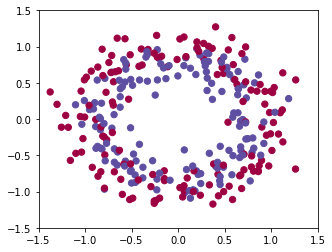

In [6]:
train_X, train_Y, test_X, test_Y = load_dataset(DataNoise = 0.15, Visualize = True)

In [7]:
train_X.shape

(2, 300)

In [8]:
train_Y.shape

(1, 300)